<a href="https://colab.research.google.com/github/2303A51804/23CSBT28-/blob/main/Assignment6_AIML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [ ]:
raw_data = pd.read_csv('Classified_Data.txt')

In [ ]:
print(raw_data)

          WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  TARGET CLASS  
0    0.643798  0.879422  

In [ ]:
raw_data = pd.read_csv('Classified_Data.txt', index_col = 0)

In [ ]:
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:



x = scaled_data

y = raw_data['TARGET CLASS']

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predictions = model.predict(x_test_data)

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       154
           1       0.90      0.91      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
print(confusion_matrix(y_test_data, predictions))

[[140  14]
 [ 13 133]]


In [ ]:
error_rates = []

In [ ]:
for i in np.arange(1, 101):

      new_model = KNeighborsClassifier(n_neighbors = i)

      new_model.fit(x_training_data, y_training_data)

      new_predictions = new_model.predict(x_test_data)

      error_rates.append(np.mean(new_predictions != y_test_data))

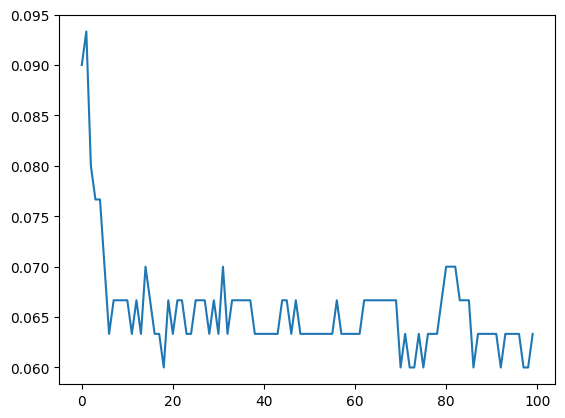

In [ ]:
plt.plot(error_rates)
